In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-provider-fraud-detection-analysis/Test-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Outpatientdata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Beneficiarydata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Inpatientdata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv


In [2]:
df_inpatient = pd.read_csv('/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv')
df_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df_inpatient.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [4]:
df_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

# Initial data notes
- `InscClaimAmtReimbursed` mostly around 7,000-10,000
- `DeductibleAmtPaid` is always 1068
- Change `ClmProcedureCode` cols to categorical
- Convert colums with `dt` in name to datetime
- `AttendingPhysician` data mostly present, with around 100 rows null out of 40,474 total
- `OperatingPhysician` data only available for about half of the data
- `OtherPhysician` data only available for 10\% of the data
- `DeductibleAmtPaid` missing about 1000 rows out of 40,474 total
- `ClmDiagnosisCode` cols have most values at 1, and decrease slowly as column number increases to 10
- `ClmProcedureCode` cols have most values at 1, and decrease sharply as column number increases to 6
- `ClmProcedureCode_6` is null, drop column

In [5]:
# convert dates
date_cols = [col for col in df_inpatient.columns if 'Dt' in col]
for date_col in date_cols:
    df_inpatient[date_col] = pd.to_datetime(df_inpatient[date_col])
df_inpatient[date_cols].head()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt
0,2009-04-12,2009-04-18,2009-04-12,2009-04-18
1,2009-08-31,2009-09-02,2009-08-31,2009-09-02
2,2009-09-17,2009-09-20,2009-09-17,2009-09-20
3,2009-02-14,2009-02-22,2009-02-14,2009-02-22
4,2009-08-13,2009-08-30,2009-08-13,2009-08-30


In [6]:
# run some data checks on dates - start date before end date, etc
print(f"Number of ClaimStartDt > ClaimEndDt: {len(df_inpatient[df_inpatient['ClaimStartDt'] > df_inpatient['ClaimEndDt']])}")
print(f"Number of AdmissionDt > DischargeDt: {len(df_inpatient[df_inpatient['AdmissionDt'] > df_inpatient['DischargeDt']])}")
print(f"Number of ClaimStartDt != AdmissionDt: {len(df_inpatient[df_inpatient['ClaimStartDt'] != df_inpatient['AdmissionDt']])}")
print(f"Number of ClaimEndDt != DischargeDt: {len(df_inpatient[df_inpatient['ClaimEndDt'] != df_inpatient['DischargeDt']])}")

Number of ClaimStartDt > ClaimEndDt: 0
Number of AdmissionDt > DischargeDt: 0
Number of ClaimStartDt != AdmissionDt: 32
Number of ClaimEndDt != DischargeDt: 17


In [7]:
# look at some of the claim dates that don't match admission/discharge dates
df_inpatient['admin_claim_start_equal'] = df_inpatient['ClaimStartDt'] == df_inpatient['AdmissionDt']
df_inpatient['discharge_claim_end_equal'] = df_inpatient['ClaimEndDt'] == df_inpatient['DischargeDt']

df_inpatient[~df_inpatient['admin_claim_start_equal']].describe()

,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AdmissionDt,DeductibleAmtPaid,DischargeDt,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,32,32,32.000000,32,30.0,32,12.000000,1.0,0.0,0.0,0.0,0.0
mean,2009-06-12 20:15:00,2009-06-18 15:45:00,12418.750000,2009-06-05 11:15:00,1068.0,2009-06-18 15:45:00,5341.750000,5119.0,NaN,NaN,NaN,NaN
min,2009-01-11 00:00:00,2009-01-23 00:00:00,0.000000,2008-12-29 00:00:00,1068.0,2009-01-23 00:00:00,66.000000,5119.0,NaN,NaN,NaN,NaN
25%,2009-03-15 06:00:00,2009-03-16 12:00:00,3750.000000,2009-03-03 12:00:00,1068.0,2009-03-16 12:00:00,3623.250000,5119.0,NaN,NaN,NaN,NaN
50%,2009-05-08 00:00:00,2009-05-19 00:00:00,6500.000000,2009-05-03 00:00:00,1068.0,2009-05-19 00:00:00,5042.500000,5119.0,NaN,NaN,NaN,NaN
75%,2009-09-12 06:00:00,2009-09-15 12:00:00,12000.000000,2009-09-09 12:00:00,1068.0,2009-09-15 12:00:00,8655.750000,5119.0,NaN,NaN,NaN,NaN
max,2009-11-26 00:00:00,2009-12-06 00:00:00,57000.000000,2009-11-18 00:00:00,1068.0,2009-12-06 00:00:00,9921.000000,5119.0,NaN,NaN,NaN,NaN
std,NaN,NaN,14654.943843,NaN,0.0,NaN,3415.618116,NaN,NaN,NaN,NaN,NaN


In [8]:
df_inpatient[~df_inpatient['discharge_claim_end_equal']].describe()

,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AdmissionDt,DeductibleAmtPaid,DischargeDt,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,17,17,17.000000,17,17.0,17,12.000000,3.000000,0.0,0.0,0.0,0.0
mean,2009-01-24 16:56:28.235294208,2009-02-06 18:21:10.588235264,16117.647059,2009-01-24 16:56:28.235294208,1068.0,2009-02-04 14:07:03.529411840,4524.166667,5487.000000,NaN,NaN,NaN,NaN
min,2008-12-01 00:00:00,2009-01-04 00:00:00,11000.000000,2008-12-01 00:00:00,1068.0,2009-01-03 00:00:00,54.000000,2762.000000,NaN,NaN,NaN,NaN
25%,2009-01-02 00:00:00,2009-01-12 00:00:00,13000.000000,2009-01-02 00:00:00,1068.0,2009-01-09 00:00:00,2919.000000,4305.500000,NaN,NaN,NaN,NaN
50%,2009-01-17 00:00:00,2009-01-27 00:00:00,16000.000000,2009-01-17 00:00:00,1068.0,2009-01-25 00:00:00,4536.500000,5849.000000,NaN,NaN,NaN,NaN
75%,2009-02-10 00:00:00,2009-02-26 00:00:00,20000.000000,2009-02-10 00:00:00,1068.0,2009-02-23 00:00:00,6887.750000,6849.500000,NaN,NaN,NaN,NaN
max,2009-05-27 00:00:00,2009-06-04 00:00:00,24000.000000,2009-05-27 00:00:00,1068.0,2009-06-01 00:00:00,8622.000000,7850.000000,NaN,NaN,NaN,NaN
std,NaN,NaN,4013.763087,NaN,0.0,NaN,3025.065824,2563.243843,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Claim start same as admission'}, ylabel='Frequency'>

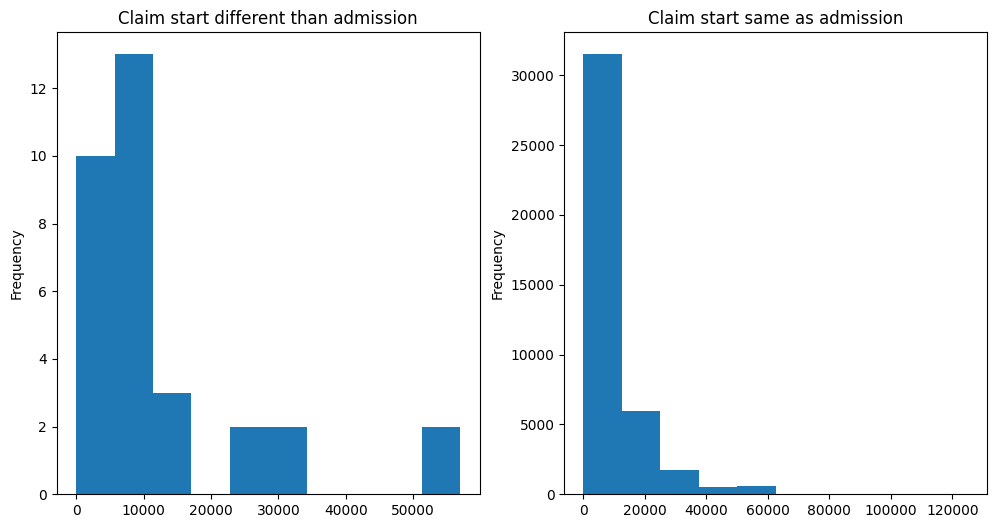

In [9]:
# visualize inconsistent claim starts reimbursals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df_inpatient[~df_inpatient['admin_claim_start_equal']]['InscClaimAmtReimbursed'].plot(kind='hist', 
                                                                                      title='Claim start different than admission',
                                                                                      ax=axes[0])
df_inpatient[df_inpatient['admin_claim_start_equal']]['InscClaimAmtReimbursed'].plot(kind='hist', 
                                                                                     title='Claim start same as admission',
                                                                                     ax=axes[1])

<Axes: title={'center': 'Claim end different than discharge'}, ylabel='Frequency'>

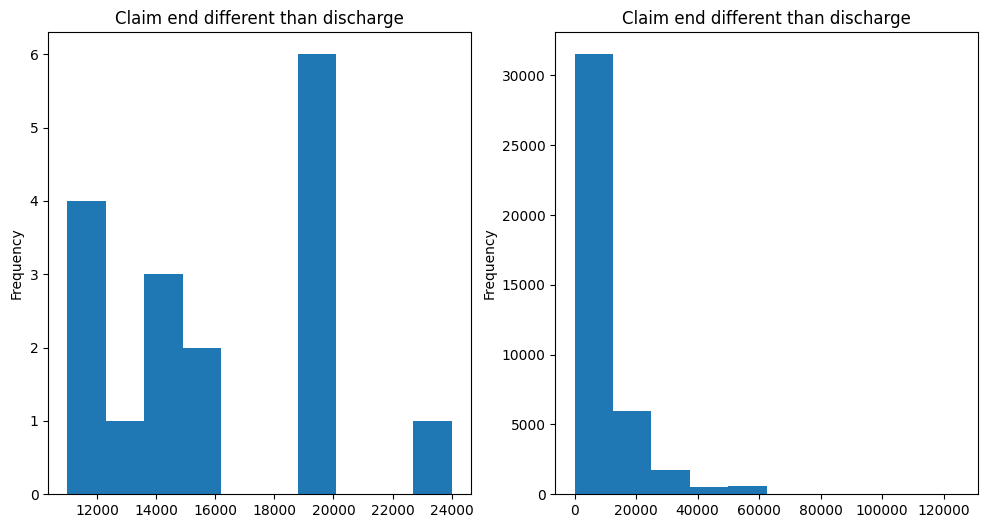

In [10]:
# visualize claim end/discharge
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df_inpatient[~df_inpatient['discharge_claim_end_equal']]['InscClaimAmtReimbursed'].plot(kind='hist', 
                                                                                        title='Claim end different than discharge',
                                                                                        ax=axes[0])
df_inpatient[df_inpatient['discharge_claim_end_equal']]['InscClaimAmtReimbursed'].plot(kind='hist', 
                                                                                       title='Claim end different than discharge',
                                                                                       ax=axes[1])

In [11]:
numerical_cols = df_inpatient.select_dtypes(include=['number']).columns.tolist()
numerical_cols

['InscClaimAmtReimbursed',
 'DeductibleAmtPaid',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [12]:
categorical_cols = df_inpatient.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['BeneID',
 'ClaimID',
 'Provider',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmAdmitDiagnosisCode',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10']

<Axes: >

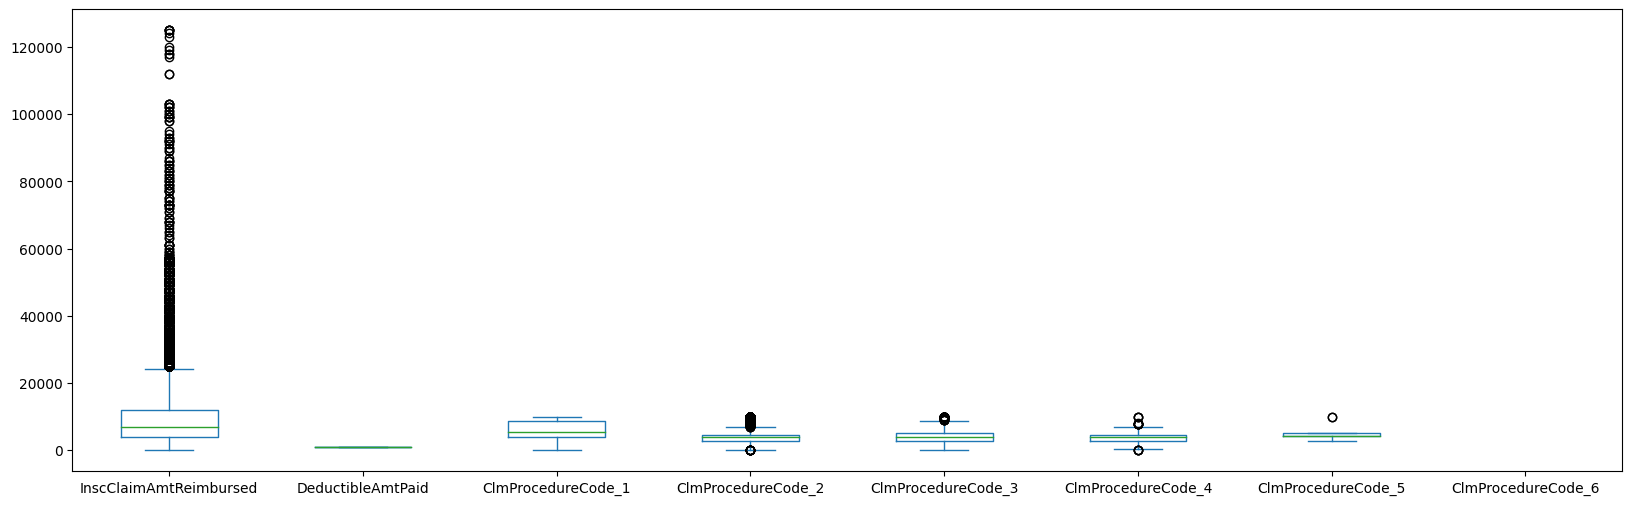

In [13]:
df_inpatient[numerical_cols].plot(kind='box', figsize=(20, 6))

# Numerical data distribution notes
## InscClaimAmtReimbursed
Amount of claim reinbursed by insurance
- Has a ton of outliers, starting from ~\$250,000

## DeductibleAmtPaid
How much the patient paid for their deductible
- Incredibly narrow range, may all be the same based off of df.describe()

## ClmProcedureCode columns
If these correspond to work done for the insurance claim, treat as categorical instead of numerical
- <mark>Do additional studies on these to find out if they are categorical</mark>

In [14]:
len(categorical_cols)

18

In [15]:
df_inpatient[categorical_cols[0:10]].describe()

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2
count,40474,40474,40474,40362,23830,4690,40474,40474,40474,40248
unique,31289,40474,2092,11604,8287,2877,1928,736,2254,2439
top,BENE134170,CLM46614,PRV52019,PHY422134,PHY429430,PHY416093,78650,882,486,4019
freq,8,1,516,386,225,81,1731,179,1499,2484


In [16]:
df_inpatient[categorical_cols[10:20]].describe()

,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
count,39798,38940,37580,35636,33216,30532,26977,3927
unique,2427,2441,2374,2358,2310,2243,2094,952
top,4019,4019,4019,4019,4019,4019,4019,4019
freq,2282,2100,1889,1620,1402,1200,965,128
